In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
sequences_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/evidence-YHE-R-6-oct.txt', sep='\\t', engine='python')

In [3]:
# remove decoys, which are indicated by a '+' in the Reverse column, and features with no intensity
sequences_df = sequences_df[pd.isna(sequences_df.Reverse) & (sequences_df.Intensity > 0)]

In [4]:
# definition of uniqueness in MaxQuant output with MBR on
unique_peptide_key = ['Sequence','Modifications','Charge']

In [5]:
sequences_df.columns

Index(['Sequence', 'Length', 'Modifications', 'Modified sequence',
       'Oxidation (M) Probabilities', 'Oxidation (M) Score Diffs',
       'Acetyl (Protein N-term)', 'Oxidation (M)', 'Missed cleavages',
       'Proteins', 'Leading proteins', 'Leading razor protein', 'Type',
       'Raw file', 'MS/MS m/z', 'Charge', 'm/z', 'Mass',
       'Uncalibrated - Calibrated m/z [ppm]',
       'Uncalibrated - Calibrated m/z [Da]', 'Mass error [ppm]',
       'Mass error [Da]', 'Uncalibrated mass error [ppm]',
       'Uncalibrated mass error [Da]', 'Max intensity m/z 0', 'Retention time',
       'Retention length', 'Calibrated retention time',
       'Calibrated retention time start', 'Calibrated retention time finish',
       'Retention time calibration', 'Ion mobility index',
       'Ion mobility length', '1/K0', '1/K0 length', 'Calibrated 1/K0', 'CCS',
       'Calibrated CCS', 'CCS length', 'Match time difference',
       'Match m/z difference', 'Match K0 difference', 'Match q-value',
       'M

In [6]:
sequences_df[unique_peptide_key].sample(n=10)

,Sequence,Modifications,Charge
137904,EMQDVQGALQCYTR,Unmodified,2
644092,YNQATPNFHQWR,Unmodified,2
333985,LKPNLGNGADLPNYR,Unmodified,3
618731,VVYENAYGQFIGPHR,Unmodified,2
633282,YETDCPLNTAVITPLK,Unmodified,2
273319,INAGLYILNPEVIDLIEMKPTSIEK,Unmodified,3
131753,ELDSGLAESVSTLIWAAPR,Unmodified,2
228781,HEANNPQLK,Unmodified,2
362588,LSEECNSLSDVLDAFSK,Unmodified,2
238200,HMNSAGVLATLR,Unmodified,2


In [7]:
sequences_df.Modifications.unique()

array(['Unmodified', 'Acetyl (Protein N-term)', 'Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', '2 Oxidation (M)',
       'Acetyl (Protein N-term),2 Oxidation (M)', '3 Oxidation (M)'],
      dtype=object)

In [8]:
sequences_df['Type'].unique()

array(['TIMS-MULTI-MSMS', 'TIMS-MULTI-MATCH'], dtype=object)

In [9]:
# unique peptides found across all runs
unique_peptides_count = len(sequences_df.drop_duplicates(subset=unique_peptide_key, keep='first', inplace=False))
unique_peptides_count

31324

In [10]:
sequences_df['group'] = sequences_df['Raw file'].apply(lambda x: x.split('_')[0])

#### analyse the YHE runs

In [11]:
yhe_only_df = sequences_df[(sequences_df.group == 'YHE114') | (sequences_df.group == 'YHE211')]

In [12]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in yhe_only_df.groupby(unique_peptide_key, as_index=False):
    sequence_occurences_l.append((group_name[0], group_name[1], len(group_df['Raw file'].unique())))
yhe_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence','charge','number_of_runs_extracted'])

In [13]:
number_of_yhe_runs_in_experiment = len(yhe_only_df['Raw file'].unique())
print('there are {} YHE runs in the experiment'.format(number_of_yhe_runs_in_experiment))

there are 21 YHE runs in the experiment


In [14]:
# display the number of missing values in only the YHE runs
yhe_sequence_occurences_df['missing_files'] = number_of_yhe_runs_in_experiment - yhe_sequence_occurences_df.number_of_runs_extracted
proportion_of_missing_extractions = yhe_sequence_occurences_df.missing_files.sum() / (len(yhe_sequence_occurences_df) * number_of_yhe_runs_in_experiment)
print("{}% of values missing across the YHE runs.".format(round(proportion_of_missing_extractions*100)))

32.0% of values missing across the YHE runs.


In [15]:
modified_sequences_count_yhe_runs = len(yhe_sequence_occurences_df)
modified_sequences_count_yhe_runs

30182

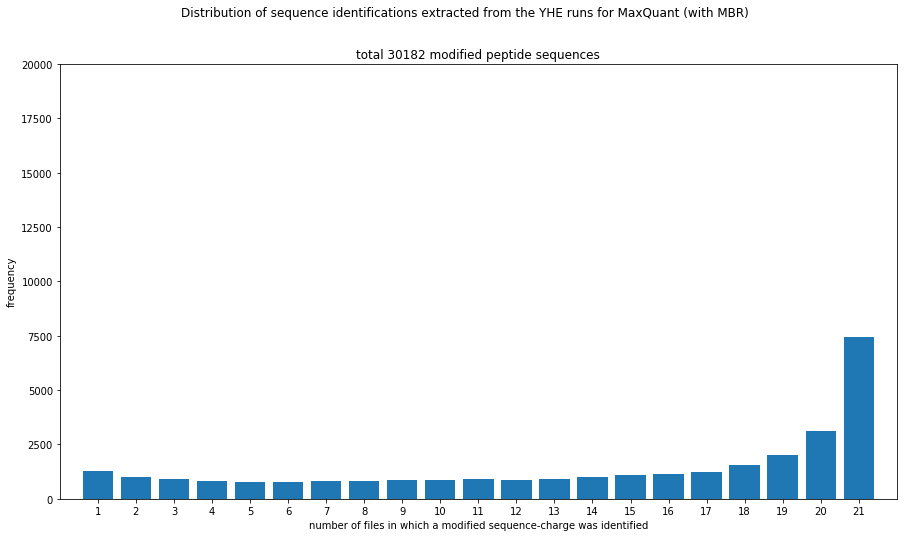

In [16]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications extracted from the YHE runs for MaxQuant (with MBR)')
plt.title('total {} modified peptide sequences'.format(modified_sequences_count_yhe_runs))

counts = np.bincount(yhe_sequence_occurences_df.number_of_runs_extracted)
ax1.bar(range(22), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,22), xlim=[0, 22])
plt.ylim((0,20000))

plt.show()

#### analyse the HeLa-only runs

In [17]:
human_only_df = sequences_df[(sequences_df.group == 'YHE010')].copy()

In [18]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in human_only_df.groupby(unique_peptide_key, as_index=False):
    sequence_occurences_l.append((group_name[0], group_name[1], len(group_df['Raw file'].unique())))
human_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence','charge','number_of_runs_extracted'])

In [19]:
number_of_human_runs_in_experiment = len(human_only_df['Raw file'].unique())
print('there are {} HeLa-only runs in the experiment'.format(number_of_human_runs_in_experiment))

there are 10 HeLa-only runs in the experiment


In [20]:
# display the number of missing values in only the HeLa-only runs
human_sequence_occurences_df['missing_files'] = number_of_human_runs_in_experiment - human_sequence_occurences_df.number_of_runs_extracted
proportion_of_missing_extractions = human_sequence_occurences_df.missing_files.sum() / (len(human_sequence_occurences_df) * number_of_human_runs_in_experiment)
print("{}% of values missing across the HeLa-only runs.".format(round(proportion_of_missing_extractions*100)))

29.0% of values missing across the HeLa-only runs.


In [21]:
modified_sequences_count_human_runs = len(human_sequence_occurences_df)
modified_sequences_count_human_runs

23890

In [22]:
human_only_df['human'] = human_only_df.apply(lambda row: 'HUMAN' in row['Leading razor protein'], axis=1)


In [23]:
# false discovery rate
print('{}%'.format(round(len(human_only_df[human_only_df.human == False]) / len(human_only_df) * 100, 2)))

3.54%


In [24]:
len(human_only_df[human_only_df.Type == 'TIMS-MULTI-MSMS']['Raw file'].unique())

10

In [40]:
# count how many identifications and extractions (i.e. matches) across all runs. Note that a sequence can be 
# counted as an identification and a match in the same file (it's given a different score).
sequence_id_mbr_counts_l = []
for group_name,group_df in sequences_df.groupby(unique_peptide_key, as_index=False):
    id_count_all_runs = len(group_df[group_df.Type == 'TIMS-MULTI-MSMS']['Raw file'].unique())
    id_count_human_only_runs = len(group_df[(group_df.Type == 'TIMS-MULTI-MSMS') & (group_df.group == 'YHE010')]['Raw file'].unique())
    mbr_count_all_runs = len(group_df[group_df.Type == 'TIMS-MULTI-MATCH']['Raw file'].unique())
    mbr_count_human_only_runs = len(group_df[(group_df.Type == 'TIMS-MULTI-MATCH') & (group_df.group == 'YHE010')]['Raw file'].unique())
    total_count_all_runs = len(group_df['Raw file'].unique())
    total_count_human_only_runs = len(group_df[(group_df.group == 'YHE010')]['Raw file'].unique())
    human = 'HUMAN' in group_df.iloc[0]['Leading razor protein']
    sequence_id_mbr_counts_l.append((group_name[0], group_name[1], group_name[2], id_count_all_runs, id_count_human_only_runs, mbr_count_all_runs, mbr_count_human_only_runs, total_count_all_runs, total_count_human_only_runs, human))
sequence_id_mbr_counts_df = pd.DataFrame(sequence_id_mbr_counts_l, columns=['sequence','modifications','charge','id_count_all_runs','id_count_human_only_runs','mbr_count_all_runs','mbr_count_human_only_runs','total_count_all_runs','total_count_human_only_runs','human'])


In [41]:
# count the number of unique peptides identified (not matched) in the human-only runs
human_id_df = sequence_id_mbr_counts_df[(sequence_id_mbr_counts_df.id_count_human_only_runs > 0)]
len(human_id_df)

20226

In [42]:
# missing values (i.e. neither identified nor matched)
(1.0 - (human_id_df.total_count_human_only_runs.sum() / (len(human_id_df) * 10))) * 100

22.763274992583803

In [43]:
# false discovery rate
len(human_id_df[human_id_df.human == False]) / len(human_id_df) * 100

1.5326807079996043

In [45]:
human_id_df.sample(n=5)

,sequence,modifications,charge,id_count_all_runs,id_count_human_only_runs,mbr_count_all_runs,mbr_count_human_only_runs,total_count_all_runs,total_count_human_only_runs,human
9656,GGAEQFMEETER,Unmodified,2,31,10,1,0,31,10,True
21940,QLETVLDDLDPENALLPAGFR,Unmodified,2,24,3,2,1,25,4,True
29162,VQGGALEDSQLVAGVAFK,Unmodified,2,18,10,0,0,18,10,True
24955,SVFPEQANNNEWAR,Unmodified,2,19,9,12,1,30,10,True
8109,FGLEGCEVLIPALK,Unmodified,2,17,8,3,0,20,8,True


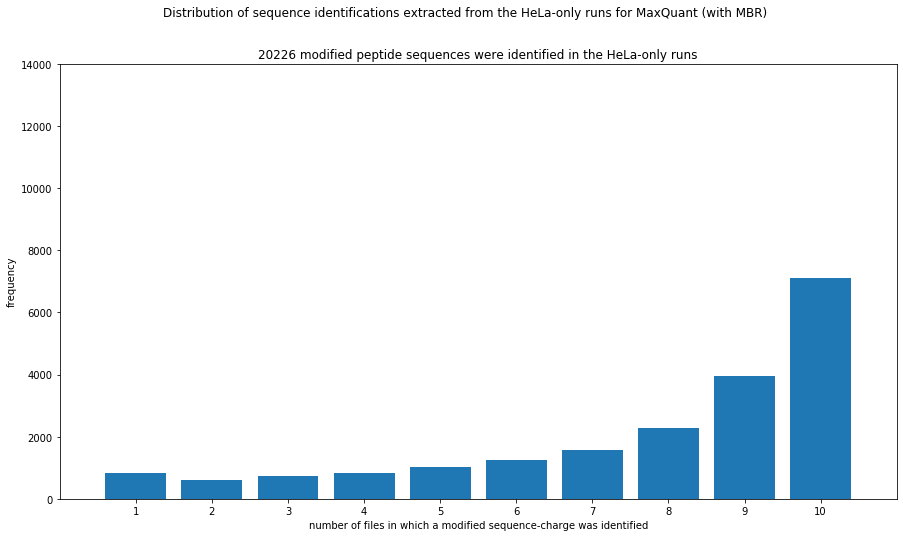

In [49]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications extracted from the HeLa-only runs for MaxQuant (with MBR)')
plt.title('{} modified peptide sequences were identified in the HeLa-only runs'.format(len(human_id_df)))

counts = np.bincount(human_id_df.total_count_human_only_runs)
ax1.bar(range(11), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,11), xlim=[0, 11])
plt.ylim((0,14000))

plt.show()